In [16]:
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
import matplotlib.pyplot as plt

In [17]:
sample_rate, signal = scipy.io.wavfile.read("OSR_us_000_0010_8k.wav")
signal = signal[0:int(3.5 * sample_rate)]
print(len(signal))

28000


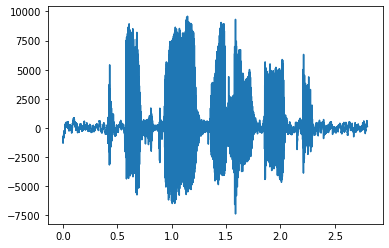

In [18]:
X_range = np.linspace(0, len(signal)/10000, len(signal))
plt.plot(X_range, signal)
plt.show()

In [19]:
pre_emphasis = 0.97
pre_emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
print(len(pre_emphasized_signal))

28000


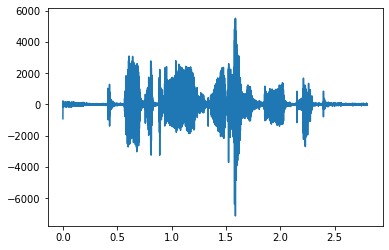

In [21]:
X_range = np.linspace(0, len(signal)/10000, len(signal))
plt.plot(X_range, pre_emphasized_signal)
plt.show()

In [22]:
frame_size = 0.025
frame_stride = 0.01

frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(pre_emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros((pad_signal_length - signal_length))
pad_signal = np.append(pre_emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=False)]

In [23]:
frames *= np.hamming(frame_length)

In [24]:
NFFT = 512

mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum